# Training a ML model using CICIoT2023

This notebook shows how a LogisticRegression model can be trained using the CICIoT2023 csv files.

In [ ]:
#Regular EDA and plotting libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# We want our plots to appear in the notebook
%matplotlib inline

## Models
from tqdm import tqdm, trange
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.metrics import RocCurveDisplay

import joblib


In [2]:
DATASET_DIRECTORY = 'CICIoT2023/'

### Importing Dataset

In [3]:
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
training_sets = df_sets[:int(len(df_sets)*.8)]
test_sets = df_sets[int(len(df_sets)*.8):]

In [4]:
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count',
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight',
]
y_column = 'label'

### Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [6]:
for train_set in tqdm(training_sets):
    scaler.fit(pd.read_csv(DATASET_DIRECTORY + train_set)[X_columns])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 135/135 [03:40<00:00,  1.63s/it]


### Classification: 34 (33+1) classes

In [7]:
ML_models = [
    LogisticRegression(n_jobs=-1),
    Perceptron(),
    AdaBoostClassifier(),
    RandomForestClassifier(n_jobs=-1),
    DecisionTreeClassifier()
]

ML_names = [
    "LogisticRegression",
    "Perceptron",
    "AdaBoost",
    "RandomForest",
    "DecisionTree"
]

# for train_set in tqdm(training_sets, desc="Training on datasets"):
#     d = pd.read_csv(DATASET_DIRECTORY + train_set)
#     d[X_columns] = scaler.transform(d[X_columns])
#     for i, model in enumerate(ML_models):
#         model.fit(d[X_columns], d[y_column])
#         print(f"{ML_names[i]} has been trained on {train_set}")
#         # Save the trained model
#         filename = f"model_34classes_{ML_names[i]}.sav"
#         joblib.dump(model, filename)
#     del d


ML_models = [joblib.load(f"model_34classes_{name}.sav") for name in ML_names]



In [8]:
# y_test = []
# preds = {i:[] for i in range(len(ML_models))}
# for test_set in tqdm(test_sets):
#     d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
#     d_test[X_columns] = scaler.transform(d_test[X_columns])

#     y_test += list(d_test[y_column].values)

#     for i in range(len(ML_models)):
#         model = ML_models[i]
#         y_pred = list(model.predict(d_test[X_columns]))
#         preds[i] = preds[i] + y_pred
## Save y_test and preds using joblib
# joblib.dump(y_test, "y_test.sav")
# joblib.dump(preds, "predictions.sav")

# Load the saved data using joblib
y_test = joblib.load("y_test.sav")
preds = joblib.load("predictions.sav")

In [11]:
# Initialize the metrics_store_34classes dictionary here
metrics_store_34classes = {}

for k, v in preds.items():
    y_pred = v
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    metrics_store_34classes[ML_names[k]] = {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "f1": f1
    }
    
    print('accuracy_score: ', accuracy)
    print('recall_score: ', recall)
    print('precision_score: ', precision)
    print('f1_score: ', f1)
    print()
    print()
    print()
    
# Save the metrics_store using joblib
joblib.dump(metrics_store_34classes, "model_metrics_34_classes.sav")


accuracy_score:  0.8023150703359454
recall_score:  0.48675247344570943
precision_score:  0.595201877275764
f1_score:  0.49388418782787796



accuracy_score:  0.8195961358822169
recall_score:  0.45463401536530634
precision_score:  0.5075059823482738
f1_score:  0.44729330337491896



accuracy_score:  0.9159432817342013
recall_score:  0.5200077931472422
precision_score:  0.5821735746510689
f1_score:  0.49324020355936493



accuracy_score:  0.9916570931535785
recall_score:  0.7032795739277584
precision_score:  0.8079794756842227
f1_score:  0.712312399457455



accuracy_score:  0.991984070654219
recall_score:  0.8101986731521572
precision_score:  0.8053026378477304
f1_score:  0.8058737512239724





['model_metrics_34_classes.sav']

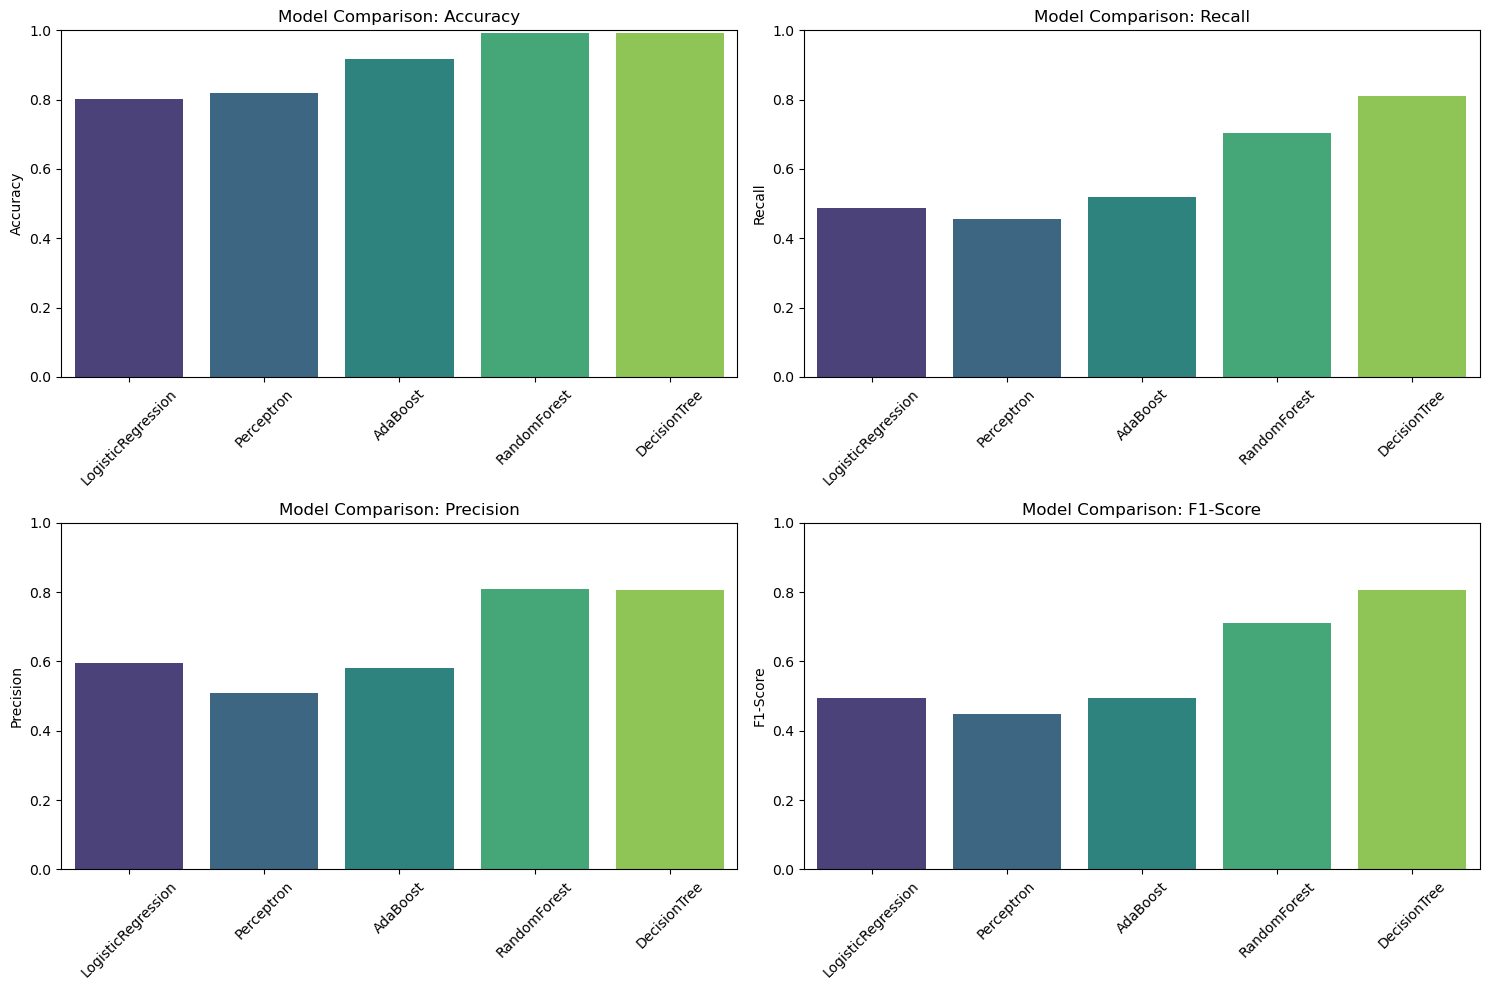

In [12]:
# Store the metrics for each model in lists
accuracies = []
recalls = []
precisions = []
f1_scores = []

# Calculate metrics for each model and append to the lists
for k, v in preds.items():
    y_pred = v
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Save the metrics using joblib
metrics_dict = {
    'accuracies': accuracies,
    'recalls': recalls,
    'precisions': precisions,
    'f1_scores': f1_scores
}

joblib.dump(metrics_dict, "metrics_data.sav")
    
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create subplots for each metric
metrics = [accuracies, recalls, precisions, f1_scores]
metric_names = ['Accuracy', 'Recall', 'Precision', 'F1-Score']

for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    plt.subplot(2, 2, i+1)

    # Create a bar plot for the metric
    sns.barplot(x=ML_names, y=metric, palette="viridis")

    plt.title(f'Model Comparison: {metric_name}')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Since all metrics are in the range [0, 1]

plt.tight_layout()
plt.show()